In [ ]:
from sklearn.datasets import fetch_20newsgroups

X, y = fetch_20newsgroups(return_X_y=True)

In [2]:
X[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [3]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(X, y, stratify=y)

- TF-IDF vectorizer와 multinomial naive Bayes classifier를 를 pipeline으로 구성
- 파이프라인을 데이터에 적용하여 예측하면
- test data의 레이블을 예측하고 실제 자료의 레이블과 confusion matrix를 확인하면

In [26]:
data = fetch_20newsgroups()
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

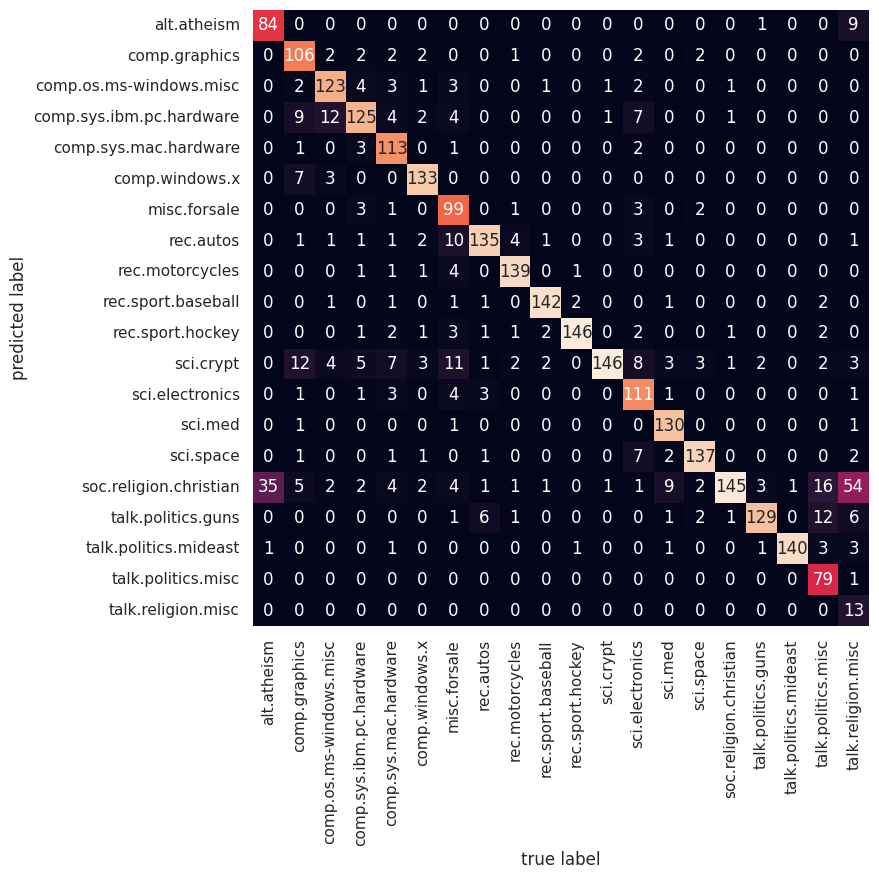

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import seaborn as sns

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train_data, train_target)
labels = model.predict(test_data)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_target, labels)
sns.set(rc = {'figure.figsize':(25,8)})
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [32]:
# prompt: classification report

from sklearn.metrics import classification_report

print(classification_report(test_target, labels))

              precision    recall  f1-score   support

           0       0.89      0.70      0.79       120
           1       0.89      0.73      0.80       146
           2       0.87      0.83      0.85       148
           3       0.76      0.84      0.80       148
           4       0.94      0.78      0.86       144
           5       0.93      0.90      0.91       148
           6       0.91      0.68      0.78       146
           7       0.84      0.91      0.87       149
           8       0.95      0.93      0.94       150
           9       0.94      0.95      0.95       149
          10       0.90      0.97      0.94       150
          11       0.68      0.98      0.80       149
          12       0.89      0.75      0.81       148
          13       0.98      0.87      0.92       149
          14       0.90      0.93      0.91       148
          15       0.50      0.97      0.66       150
          16       0.81      0.95      0.87       136
          17       0.93    

### **convet을 사용한 예측모형과 평가비표를 비교하여 기술하라**

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, remove=('headers', 'footers', 'quotes'))
X = newsgroups.data
y = newsgroups.target


In [63]:
X,y

(["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
  'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-p

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# 2. TF-IDF + Multinomial Naive Bayes Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
    ('clf', MultinomialNB())
])

In [66]:
pipeline.fit(X_train, y_train)

,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [67]:
y_pred_nb = pipeline.predict(X_test)
print("Multinomial Naive Bayes Sonuçları:")
print(classification_report(y_test, y_pred_nb, target_names=newsgroups.target_names))

Multinomial Naive Bayes Sonuçları:
                          precision    recall  f1-score   support

             alt.atheism       0.67      0.43      0.52       151
           comp.graphics       0.65      0.66      0.65       202
 comp.os.ms-windows.misc       0.65      0.65      0.65       195
comp.sys.ibm.pc.hardware       0.54      0.74      0.63       183
   comp.sys.mac.hardware       0.81      0.65      0.72       205
          comp.windows.x       0.84      0.79      0.81       215
            misc.forsale       0.74      0.69      0.72       193
               rec.autos       0.76      0.69      0.73       196
         rec.motorcycles       0.46      0.79      0.58       168
      rec.sport.baseball       0.91      0.82      0.86       211
        rec.sport.hockey       0.91      0.89      0.90       198
               sci.crypt       0.76      0.79      0.78       201
         sci.electronics       0.77      0.61      0.68       202
                 sci.med       0.85     

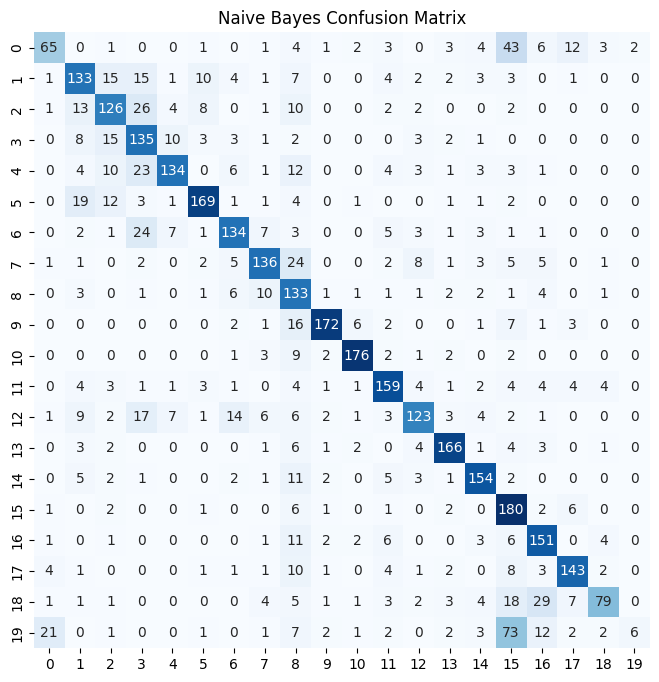

In [68]:
# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10,8))
sns.heatmap(cm_nb, annot=True, cmap='Blues',square=True, fmt='d', cbar=False)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [69]:
# 3. CNN Model

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [76]:
max_len = 200  # Maximum sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [79]:
# CNN Modeli
model = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=200),
    Conv1D(filters=256, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dense(20, activation='softmax')  # 20 sınıf
])

In [80]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [74]:
import tensorflow as tf

In [81]:
history = model.fit(
    X_train_pad, y_train,
    epochs=5,  # Epoch sayısını artırın
    batch_size=32,  # Batch boyutunu küçültün
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    ]
)

Epoch 1/5
424/424 [==============================] - 28s 63ms/step - loss: 2.3358 - accuracy: 0.2870 - val_loss: 1.4456 - val_accuracy: 0.5458
Epoch 2/5
424/424 [==============================] - 26s 60ms/step - loss: 1.1037 - accuracy: 0.6567 - val_loss: 1.1314 - val_accuracy: 0.6664
Epoch 3/5
424/424 [==============================] - 25s 60ms/step - loss: 0.6160 - accuracy: 0.8107 - val_loss: 1.1582 - val_accuracy: 0.6744
Epoch 4/5
424/424 [==============================] - 26s 61ms/step - loss: 0.3168 - accuracy: 0.9100 - val_loss: 1.3093 - val_accuracy: 0.6691
Epoch 5/5
424/424 [==============================] - 26s 61ms/step - loss: 0.1678 - accuracy: 0.9584 - val_loss: 1.4529 - val_accuracy: 0.6658


In [82]:
# CNN tahmin ve değerlendirme
y_pred_cnn = model.predict(X_test_pad)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)
print("\nCNN Sonuçları:")
print(classification_report(y_test, y_pred_cnn, target_names=newsgroups.target_names))

118/118 [==============================] - 2s 15ms/step

CNN Sonuçları:
                          precision    recall  f1-score   support

             alt.atheism       0.40      0.24      0.30       151
           comp.graphics       0.77      0.53      0.63       202
 comp.os.ms-windows.misc       0.66      0.64      0.65       195
comp.sys.ibm.pc.hardware       0.58      0.64      0.61       183
   comp.sys.mac.hardware       0.73      0.65      0.69       205
          comp.windows.x       0.82      0.77      0.79       215
            misc.forsale       0.71      0.62      0.66       193
               rec.autos       0.46      0.71      0.56       196
         rec.motorcycles       0.57      0.62      0.60       168
      rec.sport.baseball       0.83      0.79      0.81       211
        rec.sport.hockey       0.83      0.82      0.83       198
               sci.crypt       0.89      0.70      0.78       201
         sci.electronics       0.54      0.54      0.54       202
   

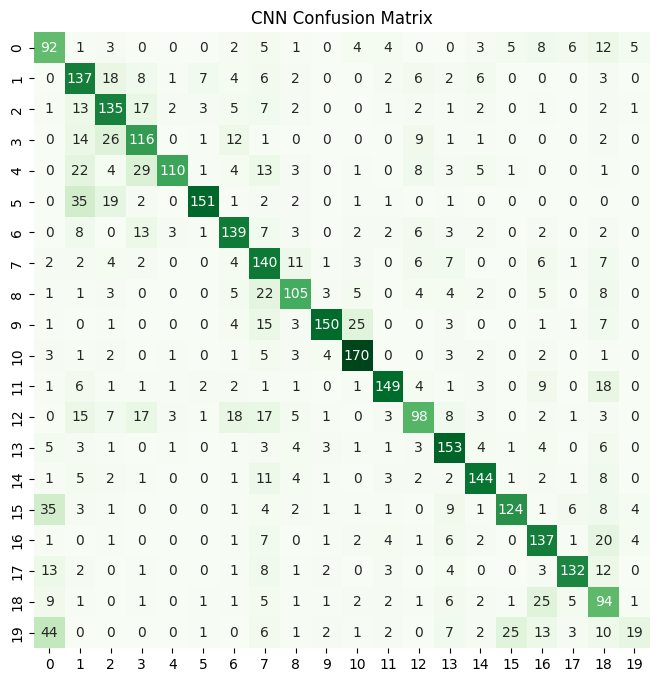

In [ ]:
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(10,8))
sns.heatmap(cm_cnn, annot=True, cmap='Greens',square=True, fmt='d', cbar=False)
plt.title("CNN Confusion Matrix")
plt.show()

In [86]:
from sklearn.metrics import accuracy_score
cnn_accuracy = accuracy_score(y_test, y_pred_cnn)

nb_accuracy=accuracy_score(y_test, y_pred_nb)
nb_accuracy,cnn_accuracy

(0.7092838196286472, 0.6374005305039788)

## 이는 "딥러닝이 항상 우수하다"는 통념이 잘못되었음을 보여주는 좋은 예시입니다. 

